## **Objective**

To create a recommender system which can recommend services to the user/customer which can improve the user experience and can help the user/customer to choose servies effectively.

## **Diving into the data**

We have a folder inside of which we have the datafiles in parquet format. In order to convert it to dataframe we would have to iteratively convert to dataframe and then merge all the dataframes as a single entity.

The data has the following features - 

* `fecha_dato` -   	The table is partitioned for this column


* `ncodpers` - 	Customer code


* `ind_empleado` - 	Employee index: A active, B ex employed, F filial, N not employee, P pasive


* `pais_residencia` - 	Customer's Country residence


* `sexo` - 	Customer's sex


* `age` - 	Age


* `fecha_alta` - 	The date in which the customer became as the first holder of a contract in the bank


* `ind_nuevo` - 	New customer Index. 1 if the customer registered in the last 6 months.


* `antiguedad` - 	Customer seniority (in months)


* `indrel` - 	1 (First/Primary), 99 (Primary customer during the month but not at the end of the month)


* `ult_fec_cli_1t` - 	Last date as primary customer (if he isn't at the end of the month)


* `indrel_1mes` - 	Customer type at the beginning of the month ,1 (First/Primary customer), 2 (co-owner ),P (Potential),3 (former primary), 4(former co-owner)


* `tiprel_1mes` -	Customer relation type at the beginning of the month, A (active), I (inactive), P (former customer),R (Potential)


* `indresi` - 	Residence index (S (Yes) or N (No) if the residence country is the same than the bank country)


* `indext` - 	Foreigner index (S (Yes) or N (No) if the customer's birth country is different than the bank country)


* `conyuemp` - 	Spouse index. 1 if the customer is spouse of an employee


* `canal_entrada` - 	channel used by the customer to join


* `indfall` - 	Deceased index. N/S


* `tipodom` - 	Addres type. 1, primary address


* `cod_prov` - 	Province code (customer's address)


* `nomprov` - 	Province name


* `ind_actividad_cliente` - 	Activity index (1, active customer; 0, inactive customer)


* `renta` - 	Gross income of the household


* `segmento` - 	segmentation: 01 - VIP, 02 - Individuals 03 - college graduated


* `ind_ahor_fin_ult1` - 	Saving Account


* `ind_aval_fin_ult1` - 	Guarantees


* `ind_cco_fin_ult1` - Current Accounts




* `ind_cder_fin_ult1` - 	Derivada Account


* `ind_cno_fin_ult1` - Payroll Account


* `ind_ctju_fin_ult1` - 	Junior Account


* `ind_ctma_fin_ult1` - 	Más particular Account


* `ind_ctop_fin_ult1` - 	particular Account


* `ind_ctpp_fin_ult1` - 	particular Plus Account


* `ind_deco_fin_ult1` - 	Short-term deposits


* `ind_deme_fin_ult1` - 	Medium-term deposits


* `ind_dela_fin_ult1` - 	Long-term deposits


* `ind_ecue_fin_ult1` - 	e-account


* `ind_fond_fin_ult1` - 	Funds


* `ind_hip_fin_ult1` - Mortgage


* `ind_plan_fin_ult1` - 	Pensions


* `ind_pres_fin_ult1` - 	Loans


* `ind_reca_fin_ult1` - 	Taxes


* `ind_tjcr_fin_ult1` - 	Credit Card


* `ind_valo_fin_ult1` - 	Securities


* `ind_viv_fin_ult1` - Home Account


* `ind_nomina_ult1` - Payroll


* `ind_nom_pens_ult1` - 	Pensions


* `ind_recibo_ult1` - Direct Debit

<a id='import'></a>

## **Import Libraries**

In [3]:
# For Data Manipulation
import numpy as np
import pandas as pd
from datetime import datetime

# For Graphical Plots
import seaborn as sns
import matplotlib.pyplot as plt

# For Data Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics.pairwise import cosine_similarity

# ML Models used to fill null values
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

# To visualize iterations
from tqdm import tqdm

# For reading files and data
import os

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Configure to display maximum columns
pd.set_option("display.max_columns",1000)

<a id='read'></a>
## **Reading The Dataset**

In [5]:
# Train data path - here paraquet files reside
train_folder = "/kaggle/input/santander-product-recommendation-parquet-data/paraquet files"

# Names of all the files inside the train folder
train_files = os.listdir(train_folder)

# Sort the files (as we will concatenate it later)
train_files.sort(key=len)

# Daatframes list
train_df_list = []

# Iterate through each file and read
for file in tqdm(train_files):
    # Complete file path
    train_file_path = os.path.join(train_folder, file)
    # Read the parquet file
    train_file = pd.read_parquet(train_file_path)
    # Append the dataframes
    train_df_list.append(train_file)

# Concatenate all the files
train_df = pd.concat(train_df_list, axis=0)

# Delete train_df_list to save space
del train_df_list

# Print head of dataframe
train_df.head()

100%|██████████| 35/35 [00:16<00:00,  2.13it/s]


,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,ult_fec_cli_1t,indrel_1mes,tiprel_1mes,indresi,indext,conyuemp,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
__null_dask_index__,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2015-02-28,932761.0,N,ES,H,27,2011-08-11,0.0,47,1.0,None,1.0,I,S,N,None,KHE,N,1.0,6.0,BADAJOZ,0.0,28279.199219,03 - UNIVERSITARIO,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2015-02-28,932760.0,N,ES,V,46,2011-08-11,0.0,47,1.0,None,1.0,I,S,N,None,KHE,N,1.0,38.0,SANTA CRUZ DE TENERIFE,0.0,NaN,02 - PARTICULARES,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2015-02-28,932759.0,N,ES,H,26,2011-08-11,0.0,47,1.0,None,1.0,A,S,N,None,KHE,N,1.0,40.0,SEGOVIA,1.0,NaN,03 - UNIVERSITARIO,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2015-02-28,932758.0,N,ES,H,25,2011-08-11,0.0,47,1.0,None,1.0,I,S,N,None,KHE,N,1.0,15.0,"CORUÑA, A",1.0,NaN,03 - UNIVERSITARIO,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2015-02-28,932757.0,N,ES,H,24,2011-08-11,0.0,47,1.0,None,1.0,A,S,N,None,KHE,N,1.0,6.0,BADAJOZ,1.0,25978.230469,03 - UNIVERSITARIO,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# Reading data description which will be used later
data_desc = pd.read_csv("/kaggle/input/santander-data-desc/data_desc.csv")

<a id='clean'></a>

## **Data Cleaning & Preprocessing**

In [7]:
# Checking percentage of null values
train_df.isnull().mean() * 100

fecha_dato                0.000000
ncodpers                  0.000000
ind_empleado              0.203220
pais_residencia           0.203220
sexo                      0.203732
age                       0.000000
fecha_alta                0.203220
ind_nuevo                 0.203220
antiguedad                0.000000
indrel                    0.203220
ult_fec_cli_1t           99.818330
indrel_1mes               1.097513
tiprel_1mes               1.097513
indresi                   0.203220
indext                    0.203220
conyuemp                 99.986752
canal_entrada             1.363829
indfall                   0.203220
tipodom                   0.203227
cod_prov                  0.685784
nomprov                   0.685784
ind_actividad_cliente     0.203220
renta                    20.475648
segmento                  1.387585
ind_ahor_fin_ult1         0.000000
ind_aval_fin_ult1         0.000000
ind_cco_fin_ult1          0.000000
ind_cder_fin_ult1         0.000000
ind_cno_fin_ult1    

<a id='clean-null'></a>

### **Treating Null Values**

In [8]:
# Deleting 'conyuemp' and 'ult_fec_cli_1t' as 99% of values were missing
train_df.drop(columns=['ult_fec_cli_1t','conyuemp'], inplace=True)

In [9]:
# Checking dataframe of null for feature ind_empleado as 0.203220 null value seems common in many features
train_df[train_df['ind_empleado'].isnull()]

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,indrel_1mes,tiprel_1mes,indresi,indext,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
__null_dask_index__,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
37,2015-02-28,932717.0,None,None,None,NA,None,NaN,NA,NaN,None,None,None,None,None,None,NaN,NaN,None,NaN,NaN,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0
1076,2015-02-28,942741.0,None,None,None,NA,None,NaN,NA,NaN,None,None,None,None,None,None,NaN,NaN,None,NaN,NaN,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0
1337,2015-02-28,943023.0,None,None,None,NA,None,NaN,NA,NaN,None,None,None,None,None,None,NaN,NaN,None,NaN,NaN,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,0.0
1352,2015-02-28,943192.0,None,None,None,NA,None,NaN,NA,NaN,None,None,None,None,None,None,NaN,NaN,None,NaN,NaN,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,0.0
1383,2015-02-28,943119.0,None,None,None,NA,None,NaN,NA,NaN,None,None,None,None,None,None,NaN,NaN,None,NaN,NaN,None,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387222,2015-05-28,1383859.0,None,None,None,NA,None,NaN,NA,NaN,None,None,None,None,None,None,NaN,NaN,None,NaN,NaN,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
387247,2015-05-28,1380656.0,None,None,None,NA,None,NaN,NA,NaN,None,None,None,None,None,None,NaN,NaN,None,NaN,NaN,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
387301,2015-05-28,1380598.0,None,None,None,NA,None,NaN,NA,NaN,None,None,None,None,None,None,NaN,NaN,None,NaN,NaN,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0


* We can see we have records have no information about the user except the service opted data. We cannot use such data for our demographic based recommender system, however we can use it for the collabrative filtering recommender systems as user's data is not required, instead we want service opted data.


* We will delete these records later, as we will be creating Collabrative Filtering First!

* We can see that there are records where no service opted exists, but there exists null values in service `ind_nomina_ult1` and `ind_nom_pens_ult1`, there are also records where the service opted exists and the values in these 2 columns are null.


* We will drop the records with no service opted later as we convert to label format.

In [10]:
# Checking records with null value in colum ind_nomina_ult1
train_df[train_df['ind_nomina_ult1'].isnull()]

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,indrel_1mes,tiprel_1mes,indresi,indext,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
__null_dask_index__,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
37,2015-02-28,932717.0,None,None,None,NA,None,NaN,NA,NaN,None,None,None,None,None,None,NaN,NaN,None,NaN,NaN,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0
1076,2015-02-28,942741.0,None,None,None,NA,None,NaN,NA,NaN,None,None,None,None,None,None,NaN,NaN,None,NaN,NaN,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0
1337,2015-02-28,943023.0,None,None,None,NA,None,NaN,NA,NaN,None,None,None,None,None,None,NaN,NaN,None,NaN,NaN,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,0.0
1352,2015-02-28,943192.0,None,None,None,NA,None,NaN,NA,NaN,None,None,None,None,None,None,NaN,NaN,None,NaN,NaN,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,0.0
2233,2015-02-28,944281.0,None,None,None,NA,None,NaN,NA,NaN,None,None,None,None,None,None,NaN,NaN,None,NaN,NaN,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385832,2015-05-28,1395208.0,None,None,None,NA,None,NaN,NA,NaN,None,None,None,None,None,None,NaN,NaN,None,NaN,NaN,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0
385874,2015-05-28,1395588.0,None,None,None,NA,None,NaN,NA,NaN,None,None,None,None,None,None,NaN,NaN,None,NaN,NaN,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0
385922,2015-05-28,1395570.0,None,None,None,NA,None,NaN,NA,NaN,None,None,None,None,None,None,NaN,NaN,None,NaN,NaN,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0


In [11]:
( train_df.isnull().sum() / train_df.shape[0] ) * 100

fecha_dato                0.000000
ncodpers                  0.000000
ind_empleado              0.203220
pais_residencia           0.203220
sexo                      0.203732
age                       0.000000
fecha_alta                0.203220
ind_nuevo                 0.203220
antiguedad                0.000000
indrel                    0.203220
indrel_1mes               1.097513
tiprel_1mes               1.097513
indresi                   0.203220
indext                    0.203220
canal_entrada             1.363829
indfall                   0.203220
tipodom                   0.203227
cod_prov                  0.685784
nomprov                   0.685784
ind_actividad_cliente     0.203220
renta                    20.475648
segmento                  1.387585
ind_ahor_fin_ult1         0.000000
ind_aval_fin_ult1         0.000000
ind_cco_fin_ult1          0.000000
ind_cder_fin_ult1         0.000000
ind_cno_fin_ult1          0.000000
ind_ctju_fin_ult1         0.000000
ind_ctma_fin_ult1   

In [12]:
train_df.shape

(13647309, 46)

In [13]:
train_df.dropna(inplace=True)

In [14]:
train_df.shape

(10795392, 46)

In [15]:
train_df.head()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,indrel_1mes,tiprel_1mes,indresi,indext,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
__null_dask_index__,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2015-02-28,932761.0,N,ES,H,27,2011-08-11,0.0,47,1.0,1.0,I,S,N,KHE,N,1.0,6.0,BADAJOZ,0.0,28279.199219,03 - UNIVERSITARIO,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2015-02-28,932757.0,N,ES,H,24,2011-08-11,0.0,47,1.0,1.0,A,S,N,KHE,N,1.0,6.0,BADAJOZ,1.0,25978.230469,03 - UNIVERSITARIO,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2015-02-28,932754.0,N,ES,H,24,2011-08-11,0.0,47,1.0,1.0,I,S,N,KHE,N,1.0,28.0,MADRID,0.0,172882.109375,03 - UNIVERSITARIO,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,2015-02-28,932752.0,N,ES,V,45,2011-08-11,0.0,47,1.0,1.0,A,S,N,KHE,N,1.0,6.0,BADAJOZ,1.0,86919.570312,02 - PARTICULARES,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,2015-02-28,932751.0,N,ES,H,29,2011-08-11,0.0,47,1.0,1.0,I,S,N,KHE,N,1.0,6.0,BADAJOZ,1.0,34384.890625,03 - UNIVERSITARIO,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [16]:
object_col=train_df.select_dtypes(include=['object'])
object_col

,fecha_dato,ind_empleado,pais_residencia,sexo,age,fecha_alta,antiguedad,indrel_1mes,tiprel_1mes,indresi,indext,canal_entrada,indfall,nomprov,segmento
__null_dask_index__,,,,,,,,,,,,,,,
0,2015-02-28,N,ES,H,27,2011-08-11,47,1.0,I,S,N,KHE,N,BADAJOZ,03 - UNIVERSITARIO
4,2015-02-28,N,ES,H,24,2011-08-11,47,1.0,A,S,N,KHE,N,BADAJOZ,03 - UNIVERSITARIO
6,2015-02-28,N,ES,H,24,2011-08-11,47,1.0,I,S,N,KHE,N,MADRID,03 - UNIVERSITARIO
7,2015-02-28,N,ES,V,45,2011-08-11,47,1.0,A,S,N,KHE,N,BADAJOZ,02 - PARTICULARES
8,2015-02-28,N,ES,H,29,2011-08-11,47,1.0,I,S,N,KHE,N,BADAJOZ,03 - UNIVERSITARIO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391905,2016-04-28,N,ES,H,79,2000-11-18,185,1.0,A,S,N,KAT,N,BARCELONA,02 - PARTICULARES
391906,2016-04-28,N,ES,V,48,2000-11-18,185,1.0,I,S,N,KAT,N,VALENCIA,02 - PARTICULARES
391907,2016-04-28,N,ES,V,43,2000-11-20,185,1.0,A,S,N,KAT,N,CIUDAD REAL,02 - PARTICULARES


In [17]:
numeric_col=train_df.select_dtypes(include=['float32'])
numeric_col.head()

,ncodpers,ind_nuevo,indrel,tipodom,cod_prov,ind_actividad_cliente,renta,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
__null_dask_index__,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,932761.0,0.0,1.0,1.0,6.0,0.0,28279.199219,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,932757.0,0.0,1.0,1.0,6.0,1.0,25978.230469,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,932754.0,0.0,1.0,1.0,28.0,0.0,172882.109375,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,932752.0,0.0,1.0,1.0,6.0,1.0,86919.570312,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,932751.0,0.0,1.0,1.0,6.0,1.0,34384.890625,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [18]:
numeric_col['tipodom'].value_counts()

1.0    10795392
Name: tipodom, dtype: int64

In [19]:
 train_df.drop(['fecha_dato' , 'fecha_alta','pais_residencia' ,'indrel_1mes','tiprel_1mes' ,'canal_entrada','nomprov' , 'ind_nuevo','indrel','tipodom','cod_prov'],axis=1 , inplace = True)

In [20]:
train_df.reset_index(drop=True,inplace=True)
train_df.head()

,ncodpers,ind_empleado,sexo,age,antiguedad,indresi,indext,indfall,ind_actividad_cliente,renta,segmento,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,932761.0,N,H,27,47,S,N,N,0.0,28279.199219,03 - UNIVERSITARIO,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,932757.0,N,H,24,47,S,N,N,1.0,25978.230469,03 - UNIVERSITARIO,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,932754.0,N,H,24,47,S,N,N,0.0,172882.109375,03 - UNIVERSITARIO,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,932752.0,N,V,45,47,S,N,N,1.0,86919.570312,02 - PARTICULARES,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,932751.0,N,H,29,47,S,N,N,1.0,34384.890625,03 - UNIVERSITARIO,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [21]:
product_names = {'ind_empleado':"EmployeeType",
"sexo":'sex',
"antiguedad":"Customer seniority",
"indresi":"ResidenceASbank",
"indext":"Foreigner",
"indfall":"Deceased ",
"ind_actividad_cliente":'Activity',
'renta': "income",
'segmento':'segmentation',
"ind_ahor_fin_ult1" : "Saving Account",
"ind_aval_fin_ult1" : "Guarantees",
"ind_cco_fin_ult1" : "Current Accounts",
"ind_cder_fin_ult1" : "Derivada Account",
"ind_cno_fin_ult1" : "Payroll Account",
"ind_ctju_fin_ult1" : "Junior Account",
"ind_ctma_fin_ult1" : "Más Particular Account",
"ind_ctop_fin_ult1" : "Particular Account",
"ind_ctpp_fin_ult1" : "Particular Plus Account",
"ind_deco_fin_ult1" : "Short-term Deposits",
"ind_deme_fin_ult1" : "Medium-term Deposits",
"ind_dela_fin_ult1" : "Long-term Deposits",
"ind_ecue_fin_ult1" : "E-account",
"ind_fond_fin_ult1" : "Funds",
"ind_hip_fin_ult1" : "Mortgage",
"ind_plan_fin_ult1" : "Pensions",
"ind_pres_fin_ult1" : "Loans",
"ind_reca_fin_ult1" : "Taxes",
"ind_tjcr_fin_ult1" : "Credit Card",
"ind_valo_fin_ult1" : "Securities",
"ind_viv_fin_ult1" : "Home Account",
"ind_nomina_ult1" : "Payroll",
"ind_nom_pens_ult1" : "Pensions",
"ind_recibo_ult1" : "Direct Debit"}

In [22]:
train_df.rename(columns = product_names , inplace = True)

In [23]:
train_df.head()

,ncodpers,EmployeeType,sex,age,Customer seniority,ResidenceASbank,Foreigner,Deceased,Activity,income,segmentation,Saving Account,Guarantees,Current Accounts,Derivada Account,Payroll Account,Junior Account,Más Particular Account,Particular Account,Particular Plus Account,Short-term Deposits,Medium-term Deposits,Long-term Deposits,E-account,Funds,Mortgage,Pensions,Loans,Taxes,Credit Card,Securities,Home Account,Payroll,Pensions,Direct Debit
0,932761.0,N,H,27,47,S,N,N,0.0,28279.199219,03 - UNIVERSITARIO,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,932757.0,N,H,24,47,S,N,N,1.0,25978.230469,03 - UNIVERSITARIO,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,932754.0,N,H,24,47,S,N,N,0.0,172882.109375,03 - UNIVERSITARIO,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,932752.0,N,V,45,47,S,N,N,1.0,86919.570312,02 - PARTICULARES,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,932751.0,N,H,29,47,S,N,N,1.0,34384.890625,03 - UNIVERSITARIO,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [24]:
train_df['Customer seniority'] = train_df['Customer seniority'].apply(lambda x: x.split()[0])
train_df['age'] = train_df['age'].apply(lambda x: x.strip())

In [25]:
object_col=train_df[['age','Customer seniority','Activity','Saving Account','Guarantees','Current Accounts','Derivada Account','Payroll Account','Junior Account','Más Particular Account','Particular Account' ,'Particular Plus Account', 'Short-term Deposits','Medium-term Deposits','Long-term Deposits','E-account','Funds','Mortgage','Pensions','Loans','Taxes' , 'Credit Card','Securities','Home Account','Payroll','Pensions','Direct Debit' ]]
for col in object_col.columns.values:
    train_df[col] = train_df[col].astype("int")

In [26]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10795392 entries, 0 to 10795391
Data columns (total 35 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   ncodpers                 float32
 1   EmployeeType             object 
 2   sex                      object 
 3   age                      int64  
 4   Customer seniority       int64  
 5   ResidenceASbank          object 
 6   Foreigner                object 
 7   Deceased                 object 
 8   Activity                 int64  
 9   income                   float32
 10  segmentation             object 
 11  Saving Account           int64  
 12  Guarantees               int64  
 13  Current Accounts         int64  
 14  Derivada Account         int64  
 15  Payroll Account          int64  
 16  Junior Account           int64  
 17  Más Particular Account   int64  
 18  Particular Account       int64  
 19  Particular Plus Account  int64  
 20  Short-term Deposits      int64  
 21  Medium

In [27]:
train_df.head()

,ncodpers,EmployeeType,sex,age,Customer seniority,ResidenceASbank,Foreigner,Deceased,Activity,income,segmentation,Saving Account,Guarantees,Current Accounts,Derivada Account,Payroll Account,Junior Account,Más Particular Account,Particular Account,Particular Plus Account,Short-term Deposits,Medium-term Deposits,Long-term Deposits,E-account,Funds,Mortgage,Pensions,Loans,Taxes,Credit Card,Securities,Home Account,Payroll,Pensions,Direct Debit
0,932761.0,N,H,27,47,S,N,N,0,28279.199219,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,932757.0,N,H,24,47,S,N,N,1,25978.230469,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,932754.0,N,H,24,47,S,N,N,0,172882.109375,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,932752.0,N,V,45,47,S,N,N,1,86919.570312,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,932751.0,N,H,29,47,S,N,N,1,34384.890625,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


# feature selection 

In [28]:
data = train_df.drop(train_df.columns[[1, 2, 3,4,5,6,7,8,9,10,32,33,34]], axis=1)
data = data.set_index('ncodpers')
data.head()

,Saving Account,Guarantees,Current Accounts,Derivada Account,Payroll Account,Junior Account,Más Particular Account,Particular Account,Particular Plus Account,Short-term Deposits,Medium-term Deposits,Long-term Deposits,E-account,Funds,Mortgage,Loans,Taxes,Credit Card,Securities,Home Account
ncodpers,,,,,,,,,,,,,,,,,,,,
932761.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
932757.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
932754.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
932752.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
932751.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [29]:
data.shape

(10795392, 20)

In [30]:
# Taking Sample from data 
data = data.sample(n=1500000)

In [32]:
# col = data.columns 
# X = data.copy()
# from sklearn.preprocessing import RobustScaler
# scaler = RobustScaler()
# x_ = scaler.fit_transform(X)
# x_ = pd.DataFrame(x_,columns = col)
# x_

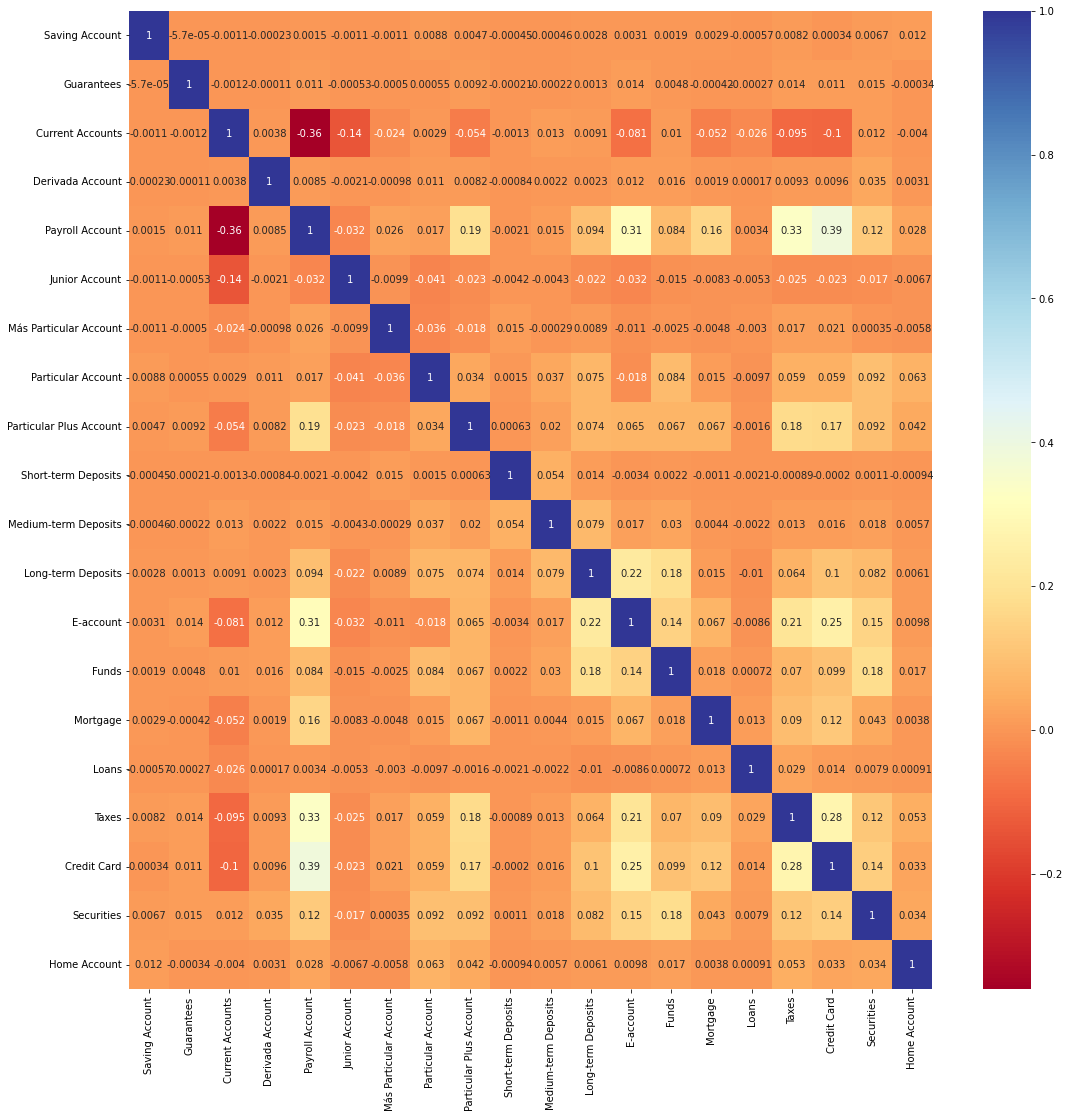

In [33]:
plt.subplots(figsize=(18,18))
sns.heatmap(data.corr(), annot=True, cmap="RdYlBu")
plt.show()

### Building Model (K-means) 

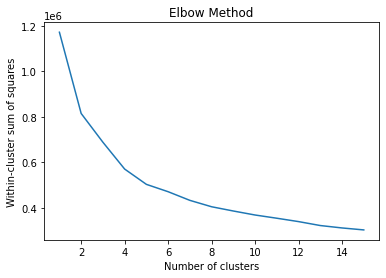

In [34]:
# from sklearn.cluster import KMeans
from sklearn.cluster import KMeans

kmeans = KMeans(random_state=42)
kmeans.fit(data)

# Calculate WCSS for different number of clusters
wcss = []
for i in range(1, 16):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

# Plot the WCSS vs. number of clusters
plt.plot(range(1, 16), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum of squares')
plt.show()

In [38]:
model = KMeans(n_clusters=5)
clusters = model.fit_predict(data)

# Assign recommendations
recommendations = {}
for i, cluster in enumerate(clusters):
    if cluster not in recommendations:
        recommendations[cluster] = data.iloc[i].sort_values(ascending=False)[:6].index.tolist()

In [39]:
recommendations

{4: ['Current Accounts',
  'Particular Account',
  'Saving Account',
  'Long-term Deposits',
  'Securities',
  'Credit Card'],
 2: ['Saving Account',
  'Guarantees',
  'Securities',
  'Credit Card',
  'Taxes',
  'Loans'],
 1: ['Current Accounts',
  'Saving Account',
  'Long-term Deposits',
  'Securities',
  'Credit Card',
  'Taxes'],
 0: ['Long-term Deposits',
  'Payroll Account',
  'Taxes',
  'E-account',
  'Saving Account',
  'Securities'],
 3: ['Long-term Deposits',
  'Current Accounts',
  'E-account',
  'Saving Account',
  'Securities',
  'Credit Card']}

In [40]:
# Print recommendations for a customer
customer_id = 932780
cluster = clusters[customer_id]
print(f"Recommendations for customer {customer_id}: {recommendations[cluster]}")

Recommendations for customer 932780: ['Current Accounts', 'Saving Account', 'Long-term Deposits', 'Securities', 'Credit Card', 'Taxes']


In [41]:
data.to_csv('Bankproducts.csv', index=True)

In [ ]:
# import joblib

# joblib.dump(model, 'model.h5')
# joblib.dump(data.columns, 'inputs.h5')